# Data Preparation

In [ ]:
#Import Dataset

import os
import zipfile

dataset_zip = 'D:/Bangkit Final Project/sleaf_dataset.zip'
zip_ref = zipfile.ZipFile(dataset_zip, 'r')
zip_ref.extractall('/Bangkit Final Project/sleaf_dataset')
zip_ref.close()

In [1]:
#Training Directory

import os

train_dir = 'sleaf_dataset/train/'
train_label = os.listdir(train_dir)
print(train_label[:10])

['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_negundo', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus']


In [2]:
#Total Training Images

total_train_label = len(train_label)
print('total training labels : ', total_train_label, '\n')

total_train_images = 0
for leaf in train_label:
    total_images = len(os.listdir( train_dir + leaf))
    
    print('total training images of ' + leaf + ' : ', total_images)
    total_train_images += total_images


print('\nentire training images : ', total_train_images)

total training labels :  185 

total training images of abies_concolor :  201
total training images of abies_nordmanniana :  127
total training images of acer_campestre :  115
total training images of acer_ginnala :  121
total training images of acer_griseum :  101
total training images of acer_negundo :  183
total training images of acer_palmatum :  170
total training images of acer_pensylvanicum :  124
total training images of acer_platanoides :  112
total training images of acer_pseudoplatanus :  108
total training images of acer_rubrum :  238
total training images of acer_saccharinum :  150
total training images of acer_saccharum :  146
total training images of aesculus_flava :  105
total training images of aesculus_glabra :  131
total training images of aesculus_hippocastamon :  111
total training images of aesculus_pavi :  180
total training images of ailanthus_altissima :  96
total training images of albizia_julibrissin :  115
total training images of amelanchier_arborea :  105


### Generating Bounding Box

In [3]:
#Bounding Box Formula

import cv2

def generate_object_boundingbox(img):
    '''
    generate object bounding box using Canny
    :params img: image containing the object
    :return list: (x_left, y_top, x_right, y_bottom)
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = cv2.blur(img_gray, (3,3))
    img_canny =  cv2.Canny(img_gray, 100, 100*2)

    contours, _ = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # generate bounding boxes
    bounding_boxes = []
    for contour in contours:
        polygon = cv2.approxPolyDP(contour, 3, True)
        bounding_boxes.append(cv2.boundingRect(polygon))
    
    # find the outer bounding box
    x_r, y_b = 0, 0
    x_l, y_t, _ = img.shape
    for box in bounding_boxes:
        if box[0] < x_l:
            x_l = box[0]
        if box[1] < y_t:
            y_t = box[1]
        if box[0] + box[2] > x_r:
            x_r = box[0] + box[2]
        if box[1] + box[3] > y_b:
            y_b = box[1] + box[3]
    return x_l, y_t, x_r, y_b



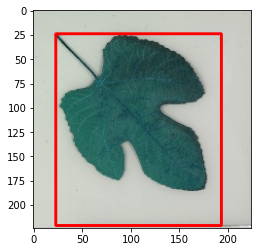

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_img = cv2.imread('sleaf_dataset/test/ficus_carica/wb1370-03-2.jpg')
img = input_img
x_l, y_t, x_r, y_b = generate_object_boundingbox(img)

# draw the rect
image_copy = np.copy(img)

cv2.rectangle(image_copy, (x_l, y_t), (x_r, y_b), [255,0,0], 2)
_ = plt.imshow(image_copy)
plt.show()

### GrabCut Images

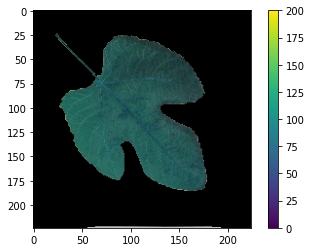

In [5]:
#Grabcut Images

import cv2
import numpy as np
import matplotlib.pyplot as plt

mask = np.zeros(img.shape[:2], np.uint8)
bgdmodel = np.zeros((1, 65), np.float64)
fgdmodel = np.zeros((1, 65), np.float64)

rect = generate_object_boundingbox(img)

cv2.grabCut(img, mask, rect, bgdmodel, fgdmodel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

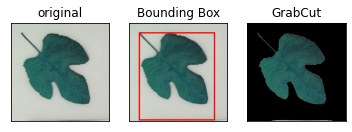

In [6]:
outputMask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1)

outputMask = (outputMask * 255).astype("uint8")

output = cv2.bitwise_and(img, img, mask=outputMask)

plt.subplot(131), plt.imshow(input_img), plt.title("original")
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_copy), plt.title("Bounding Box")
plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(output), plt.title("GrabCut")
plt.xticks([]), plt.yticks([])
plt.show()

## bounding box and grabcut samples

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

label_index = []
for i in range(len(train_label)):
    label_index.append(i)   

castanea_dentata


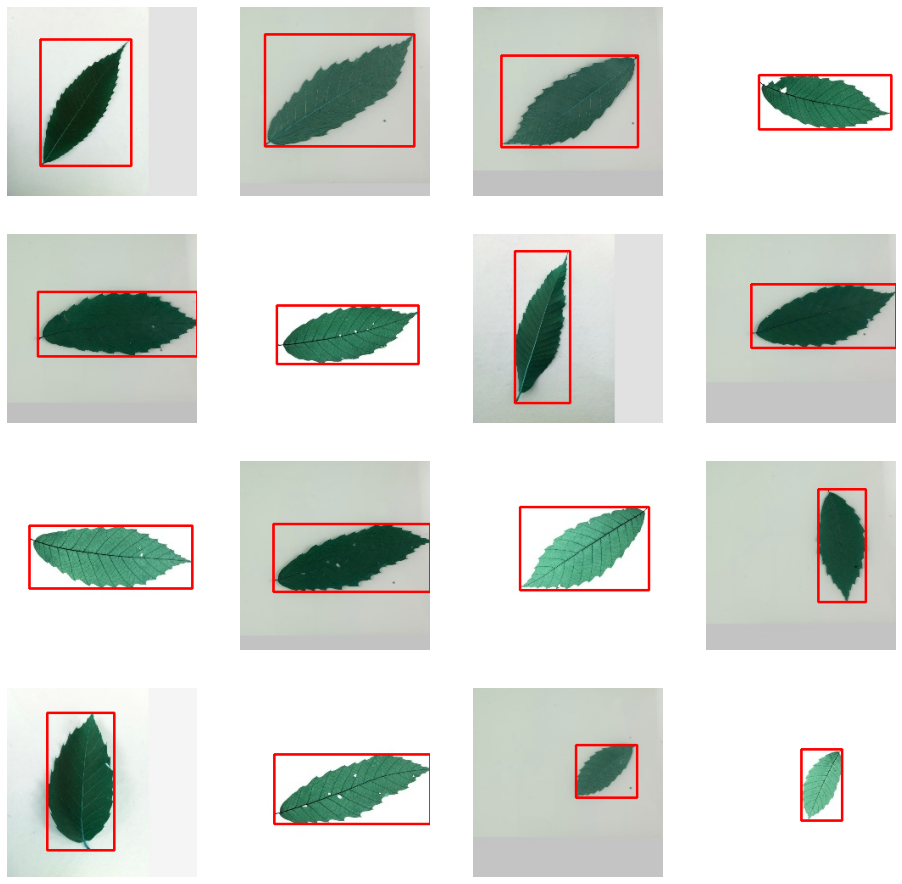

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

#Select 1 Label Randomly
label_idx = random.choice(label_index)
next_label = [os.path.join(train_dir, train_label[label_idx])]
print(train_label[label_idx])

#Images Directory
image_dir = str("".join(next_label)) + '/'

#Select 16 Images Randomly
img_list = os.listdir(image_dir)
img_list_16 = random.sample(img_list, 16)

next_pic = [os.path.join(image_dir, fname)
           for fname in img_list_16]

#-----------------------------------------------------------------


# Get 16 Samples Bounding Box  
for i, img_path in enumerate(next_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    leaf = mpimg.imread(img_path) 
    
    leaf = cv2.imread(next_pic[i])
    
    x_l, y_t, x_r, y_b = generate_object_boundingbox(leaf)
    
    # draw the rect
    image_boxed = np.copy(leaf)
    
    cv2.rectangle(image_boxed, (x_l, y_t), (x_r, y_b), [255,0,0], 2)
    plt.imshow(image_boxed)
    
plt.show()


castanea_dentata


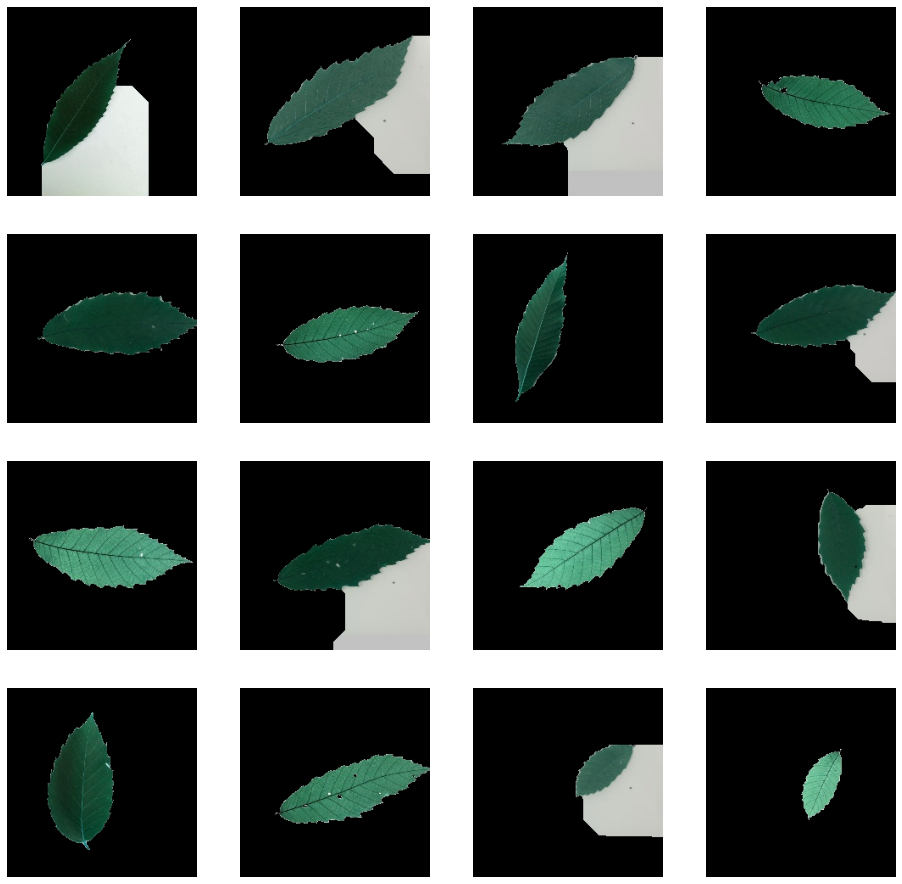

In [9]:
#Grabcut

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

print(train_label[label_idx])

# Get GrabCut Images 
for i, img_path in enumerate(next_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    leaf = mpimg.imread(img_path) 
    
    leaf = cv2.imread(next_pic[i])
    
    mask = np.zeros(leaf.shape[:2], np.uint8)
    bgdmodel = np.zeros((1, 65), np.float64)
    fgdmodel = np.zeros((1, 65), np.float64)

    rect = generate_object_boundingbox(leaf)

    cv2.grabCut(leaf, mask, rect, bgdmodel, fgdmodel, 10, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    leaf = leaf*mask2[:,:,np.newaxis]
    plt.imshow(leaf)
    #plt.colorbar()
    
plt.show()

